In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [20]:
def plot_data(x, y, x_err, y_err, yaxis):
    fig, ax = plt.subplots()
    ax.errorbar(x, y, xerr=x_err, yerr=y_err, fmt='o')
    ax.set_xlabel('time')
    ax.set_ylabel(yaxis)
    ax.set_xscale('log')
    plt.show()


In [27]:
df = pd.read_csv("hyperParamOpt/hyperParOptResults2.csv", index_col=0)

In [28]:
times = ["TimeToRun-fold{}".format(i) for i in range(5)]
rocAUCs = ["rocAUC-fold{}".format(i) for i in range(5)]
fOnes = ["F1score-fold{}".format(i) for i in range(5)]
accuracies = ["Accuracy-fold{}".format(i) for i in range(5)]

In [29]:
df["TimeToRun-mean"] = df[times].mean(axis=1)
df["TimeToRun-std"] = df[times].std(axis=1)
df["rocAUC-mean"] = df[rocAUCs].mean(axis=1)
df["rocAUC-std"] = df[rocAUCs].std(axis=1)
df["fOne-mean"] = df[fOnes].mean(axis=1)
df["fOne-std"] = df[fOnes].std(axis=1)
df["accuracy-mean"] = df[accuracies].mean(axis=1)
df["accuracy-std"] = df[accuracies].std(axis=1)

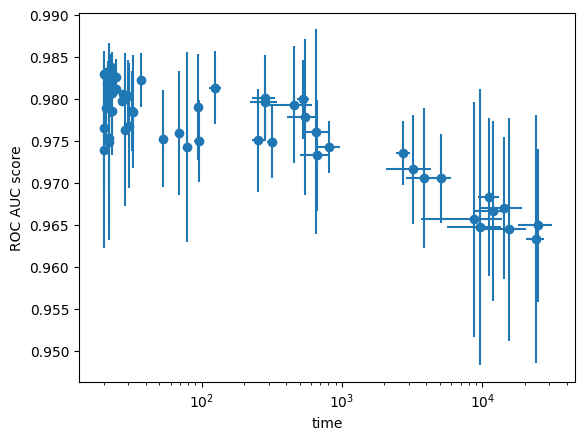

In [30]:
x = df['TimeToRun-mean']
y = df["rocAUC-mean"]
xerr = df['TimeToRun-std']
yerr=df["rocAUC-std"]
plot_data(x, y, xerr, yerr, 'ROC AUC score')

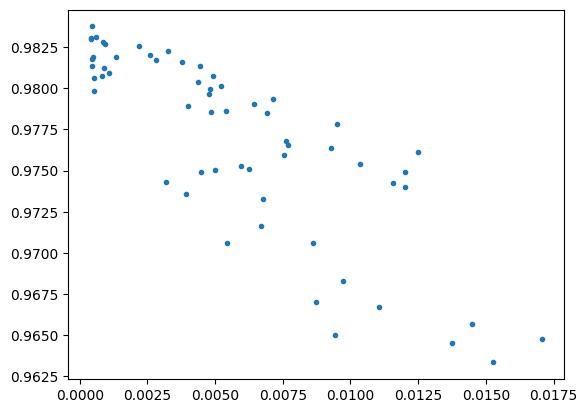

In [31]:
plt.plot(yerr/y, y, '.')

In [37]:
df[:3]

,TimeToRun-fold0,TimeToRun-fold1,TimeToRun-fold2,TimeToRun-fold3,TimeToRun-fold4,rocAUC-fold0,rocAUC-fold1,rocAUC-fold2,rocAUC-fold3,rocAUC-fold4,...,Accuracy-fold3,Accuracy-fold4,TimeToRun-mean,TimeToRun-std,rocAUC-mean,rocAUC-std,fOne-mean,fOne-std,accuracy-mean,accuracy-std
"('RBF', '10000.0', 'scale', 'None')",54.111400,48.189045,53.698059,55.889224,53.157923,0.971831,0.980556,0.981058,0.967455,0.975524,...,0.9296,0.9532,53.009130,2.882704,0.975285,0.005797,0.964714,0.006133,0.94568,0.009762
"('RBF', '100000.0', 'scale', 'None')",347.647071,291.213869,294.618474,321.260394,332.439167,0.970711,0.980562,0.977088,0.970321,0.976019,...,0.9280,0.9514,317.435795,24.293361,0.974940,0.004376,0.963125,0.006426,0.94336,0.010033
"('RBF', '1000000.0', 'scale', 'None')",5505.322335,3284.098932,3018.127798,3501.273070,3879.408715,0.968563,0.980511,0.977671,0.965707,0.960475,...,0.9202,0.9274,3837.646170,984.131555,0.970585,0.008349,0.956802,0.007117,0.93396,0.011113


In [48]:
df.index[:4]

Index(['('RBF', '10000.0', 'scale', 'None')',
       '('RBF', '100000.0', 'scale', 'None')',
       '('RBF', '1000000.0', 'scale', 'None')',
       '('RBF', '10000000.0', 'scale', 'None')'],
      dtype='object')

In [ ]:
df['kernel'] = ast.literal_eval(df.index)

In [ ]:
ast.literal_eval(df.index[0])[2]

In [70]:
df = df.assign(kernel = df.index.map(lambda x: str(ast.literal_eval(x)[0])))

In [71]:
df[:2]

,TimeToRun-fold0,TimeToRun-fold1,TimeToRun-fold2,TimeToRun-fold3,TimeToRun-fold4,rocAUC-fold0,rocAUC-fold1,rocAUC-fold2,rocAUC-fold3,rocAUC-fold4,...,TimeToRun-mean,TimeToRun-std,rocAUC-mean,rocAUC-std,fOne-mean,fOne-std,accuracy-mean,accuracy-std,kernel,cClass
"('RBF', '10000.0', 'scale', 'None')",54.111400,48.189045,53.698059,55.889224,53.157923,0.971831,0.980556,0.981058,0.967455,0.975524,...,53.009130,2.882704,0.975285,0.005797,0.964714,0.006133,0.94568,0.009762,RBF,10000.0
"('RBF', '100000.0', 'scale', 'None')",347.647071,291.213869,294.618474,321.260394,332.439167,0.970711,0.980562,0.977088,0.970321,0.976019,...,317.435795,24.293361,0.974940,0.004376,0.963125,0.006426,0.94336,0.010033,RBF,100000.0


In [91]:
df = df.assign(cClass = df.index.map(lambda x: float(ast.literal_eval(x)[1])))

In [74]:
df = df.assign(gamma = df.index.map(lambda x: str(ast.literal_eval(x)[2])))

In [75]:
df = df.assign(weight = df.index.map(lambda x: str(ast.literal_eval(x)[3])))

In [79]:
import seaborn as sns

In [52]:
import ast

<AxesSubplot: xlabel='fOne-mean', ylabel='rocAUC-mean'>

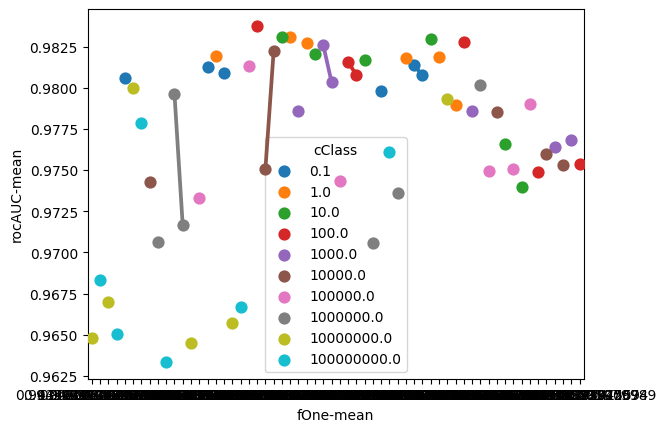

In [84]:
sns.pointplot(x="fOne-mean", y="rocAUC-mean", hue=df['cClass'], data=df)


In [92]:
color2= {0.1: "#F8D1CC",
1: "#F3BFB7",
10: "#EEA8A1",
100: "#E9918C",
1000: "#E47A76",
10000: "#DF6261",
100000: "#DA4B4B",
1000000: "#D53F3F",
10000000: "#CF3333",
100000000: "#C92828"}

In [96]:
color3 = {0.1: "#1f77b4",
1.0: "#ff7f0e",
10: "#2ca02c",
100: "#d62728",
1000: "#9467bd",
10000: "#8c564b",
100000: "#e377c2",
1000000: "#7f7f7f",
10000000: "#bcbd22",
100000000: "#17becf"}

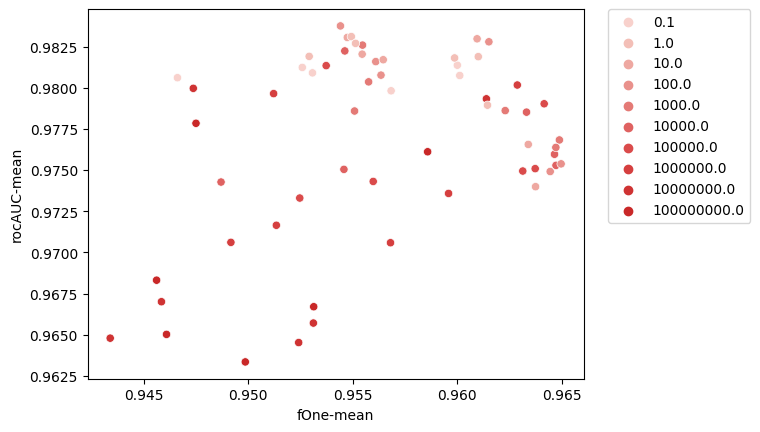

In [94]:
sns.scatterplot(x="fOne-mean", y="rocAUC-mean", hue=df['cClass'], data=df, palette=color2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


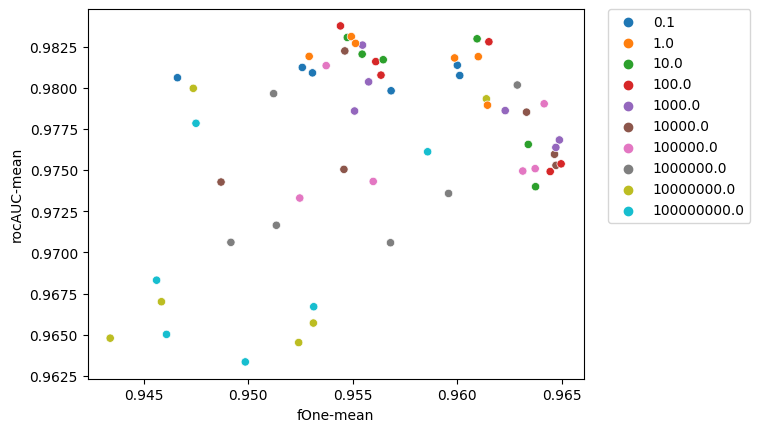

In [97]:
sns.scatterplot(x="fOne-mean", y="rocAUC-mean", hue=df['cClass'], data=df, palette=color3)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<AxesSubplot: xlabel='fOne-mean', ylabel='rocAUC-mean'>

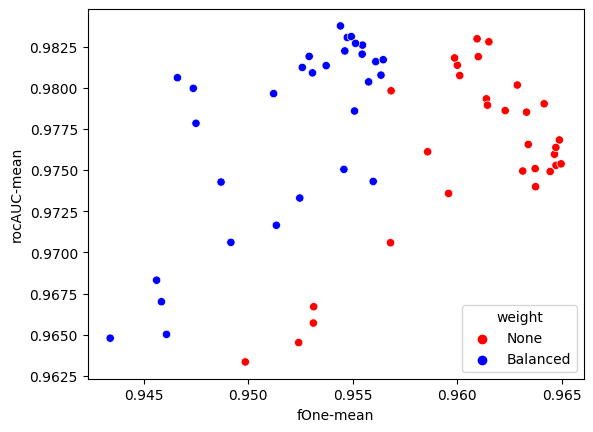

In [90]:
color = {'None':'red', 'Balanced':'blue'}
sns.scatterplot(x="fOne-mean", y="rocAUC-mean", hue=df['weight'], data=df, palette=color)


In [98]:
df[:3]

,TimeToRun-fold0,TimeToRun-fold1,TimeToRun-fold2,TimeToRun-fold3,TimeToRun-fold4,rocAUC-fold0,rocAUC-fold1,rocAUC-fold2,rocAUC-fold3,rocAUC-fold4,...,rocAUC-mean,rocAUC-std,fOne-mean,fOne-std,accuracy-mean,accuracy-std,kernel,cClass,gamma,weight
"('RBF', '10000.0', 'scale', 'None')",54.111400,48.189045,53.698059,55.889224,53.157923,0.971831,0.980556,0.981058,0.967455,0.975524,...,0.975285,0.005797,0.964714,0.006133,0.94568,0.009762,RBF,10000.0,scale,None
"('RBF', '100000.0', 'scale', 'None')",347.647071,291.213869,294.618474,321.260394,332.439167,0.970711,0.980562,0.977088,0.970321,0.976019,...,0.974940,0.004376,0.963125,0.006426,0.94336,0.010033,RBF,100000.0,scale,None
"('RBF', '1000000.0', 'scale', 'None')",5505.322335,3284.098932,3018.127798,3501.273070,3879.408715,0.968563,0.980511,0.977671,0.965707,0.960475,...,0.970585,0.008349,0.956802,0.007117,0.93396,0.011113,RBF,1000000.0,scale,None


In [100]:
df['rocAUC-relError'] = df["rocAUC-std"]/df["rocAUC-mean"]

In [110]:
df['fOne-relError'] = df["fOne-std"]/df["fOne-mean"]

In [113]:
df['accuracy-relError'] = df["accuracy-std"]/df["accuracy-mean"]

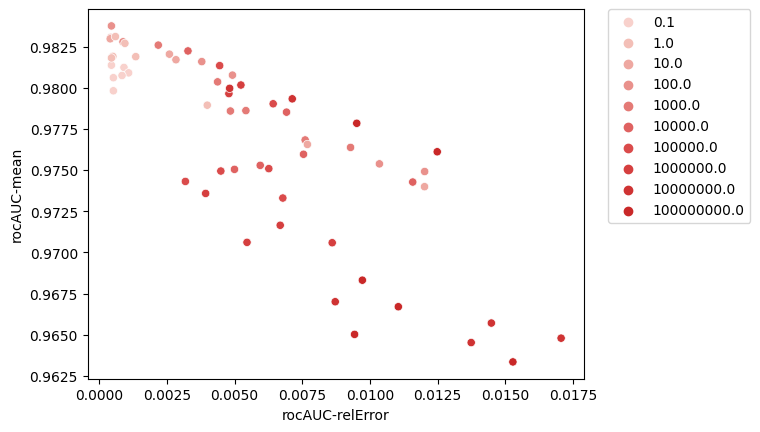

In [107]:
sns.scatterplot(x="rocAUC-relError", y="rocAUC-mean", hue=df['cClass'], data=df, palette=color2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


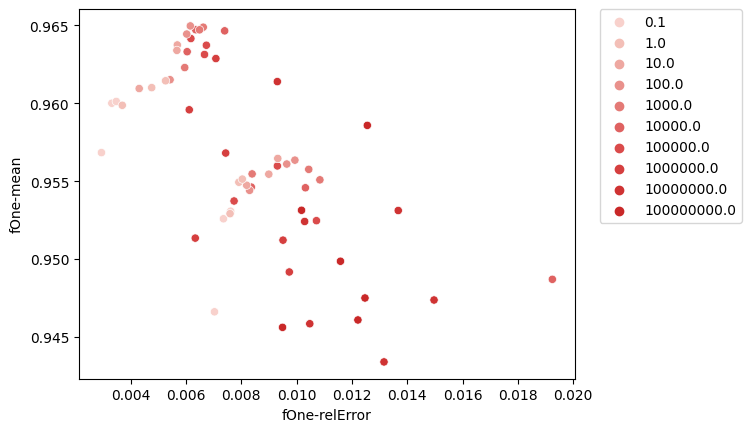

In [120]:
sns.scatterplot(x="fOne-relError", y="fOne-mean", hue=df['cClass'], data=df, palette=color2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


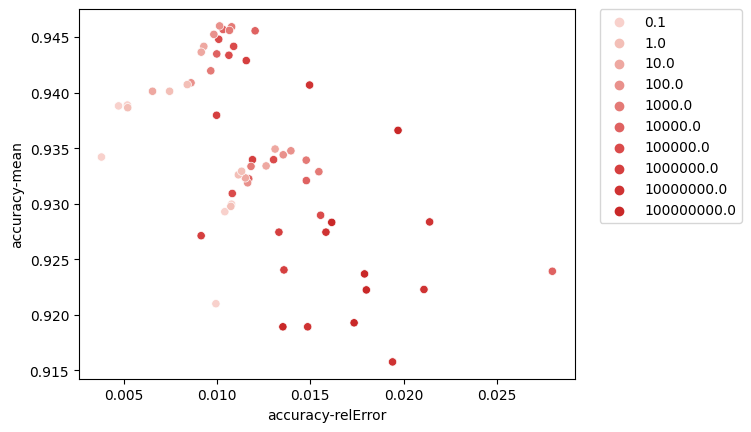

In [121]:
sns.scatterplot(x="accuracy-relError", y="accuracy-mean", hue=df['cClass'], data=df, palette=color2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


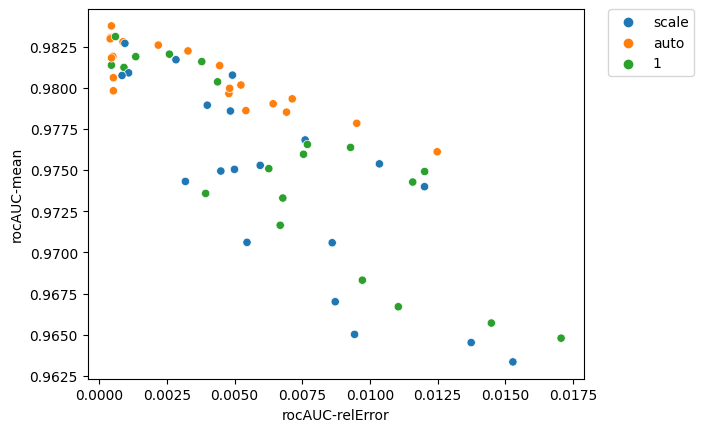

In [108]:
sns.scatterplot(x="rocAUC-relError", y="rocAUC-mean", hue=df['gamma'], data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


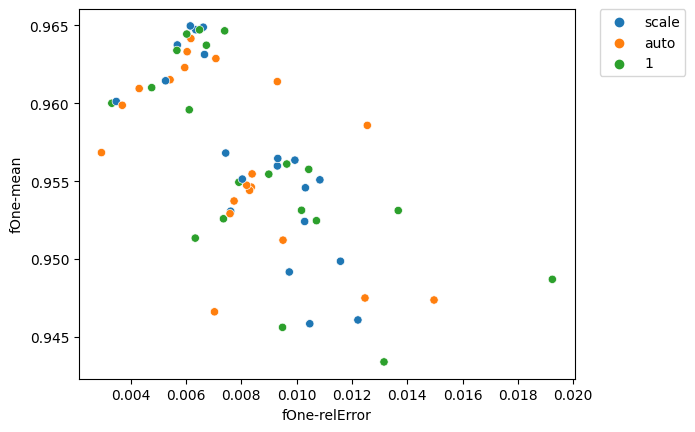

In [115]:
sns.scatterplot(x="fOne-relError", y="fOne-mean", hue=df['gamma'], data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


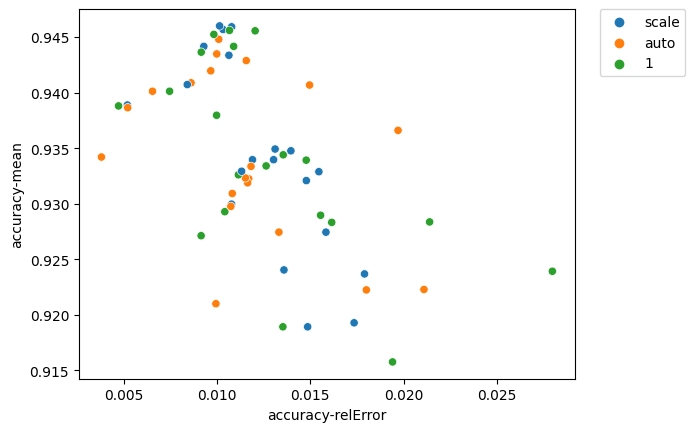

In [119]:
sns.scatterplot(x="accuracy-relError", y="accuracy-mean", hue=df['gamma'], data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

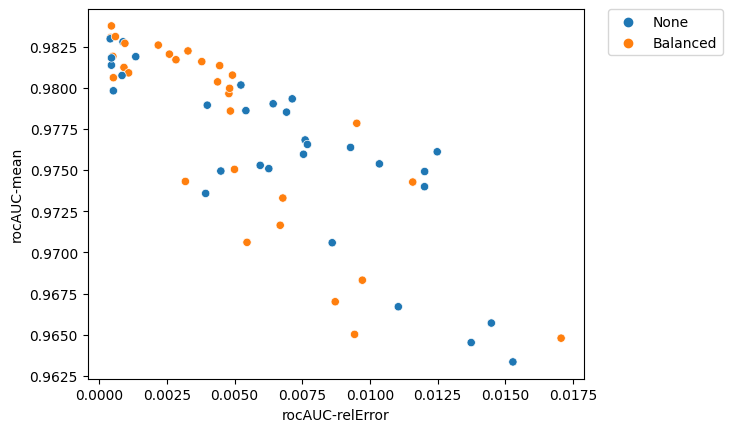

In [116]:
sns.scatterplot(x="rocAUC-relError", y="rocAUC-mean", hue=df['weight'], data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


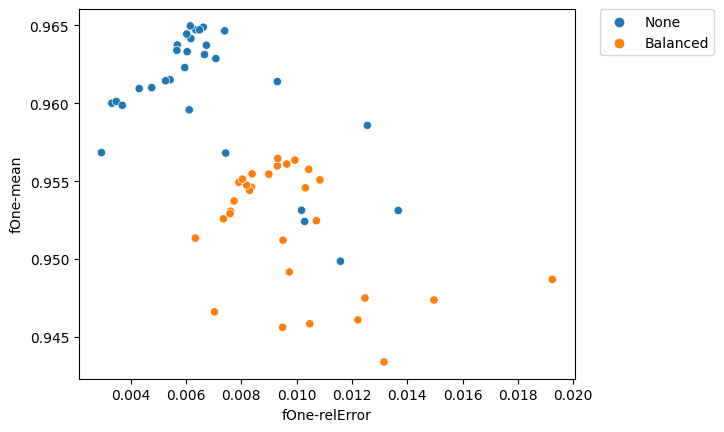

In [117]:
sns.scatterplot(x="fOne-relError", y="fOne-mean", hue=df['weight'], data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

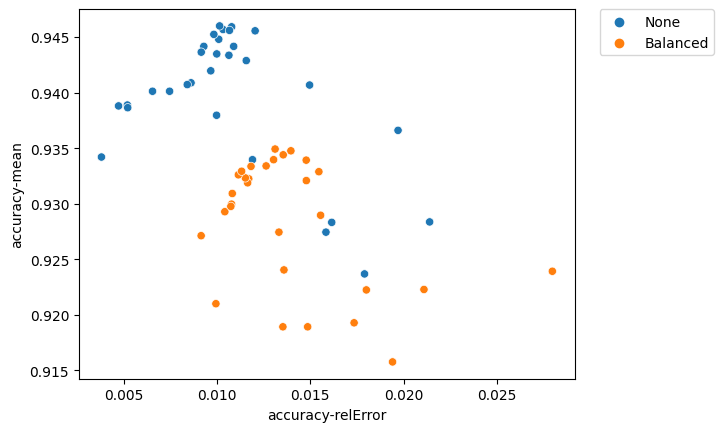

In [118]:
sns.scatterplot(x="accuracy-relError", y="accuracy-mean", hue=df['weight'], data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
colors = {'None': 'blue', 'Balanced': 'green'}
df.groupby(df.index.str[:6]).apply(lambda x: plt.scatter(x['column1'], x['column2'], c=colors[x.name]))

Balanced    <matplotlib.collections.PathCollection object ...
None        <matplotlib.collections.PathCollection object ...
dtype: object

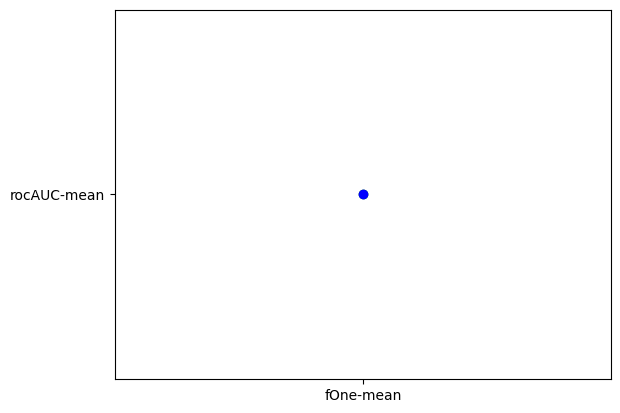

In [58]:
colors = {'None': 'blue', 'Balanced': 'green'}
df.groupby(lambda x: ast.literal_eval(x)[3]).apply(lambda k, colors: plt.scatter(x='fOne-mean', y='rocAUC-mean', c=colors[k.name]), colors=colors)


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not {'None': 'blue', 'Balanced': 'green'}

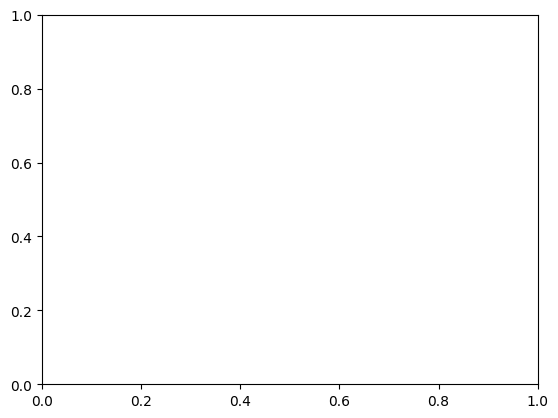

In [38]:
colors = {'None': 'blue', 'Balanced': 'green'}
df.groupby(lambda x: x[2]).plot.scatter(x='fOne-mean', y='rocAUC-mean', c=colors, colormap='viridis')

In [7]:
df2 = df[df['TimeToRun-mean']<2500]

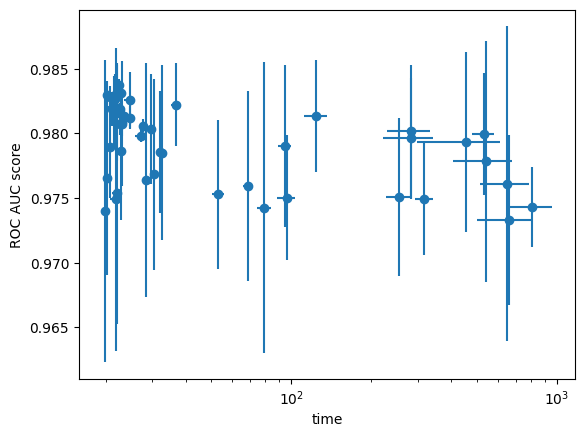

In [8]:
x = df2['TimeToRun-mean']
y = df2["rocAUC-mean"]
xerr = df2['TimeToRun-std']
yerr=df2["rocAUC-std"]
plot_data(x, y, xerr, yerr, 'ROC AUC score')

In [9]:
df3 = df[df['TimeToRun-mean']<200]

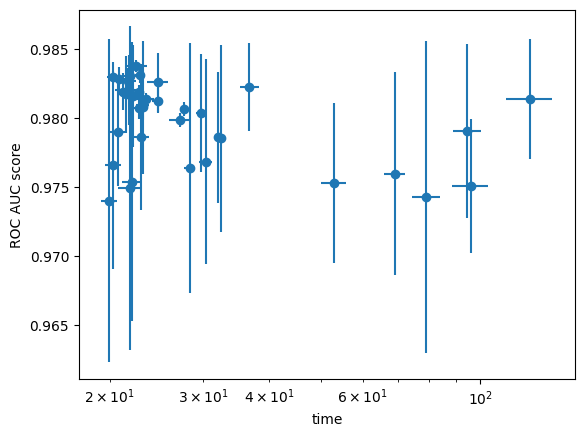

In [10]:
x = df3['TimeToRun-mean']
y = df3["rocAUC-mean"]
xerr = df3['TimeToRun-std']
yerr=df3["rocAUC-std"]
plot_data(x, y, xerr, yerr, 'ROC AUC score')

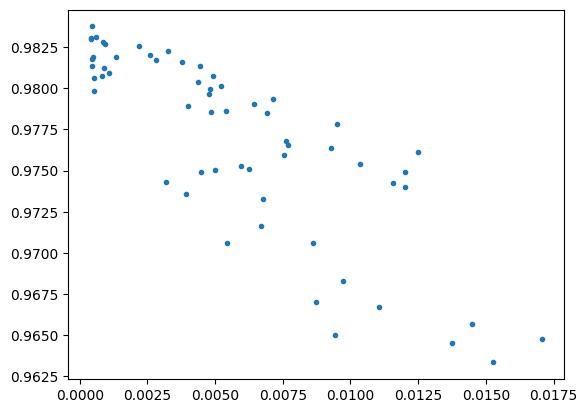

In [26]:
plt.plot(yerr/y, y, '.')

In [57]:
df4 = df[(df["rocAUC-std"]/df["rocAUC-mean"]<0.0025) & (df["rocAUC-mean"]>0.98)]

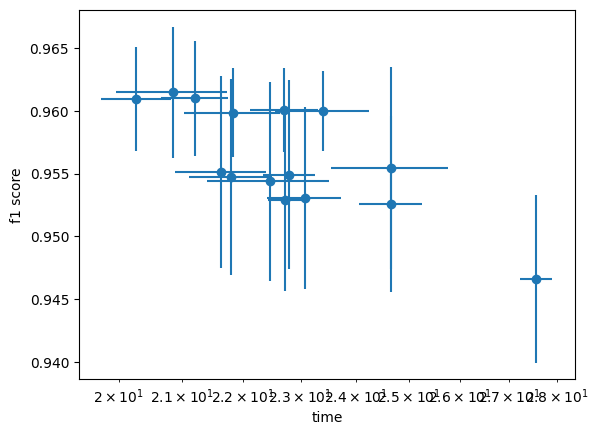

In [58]:
xx = df4['TimeToRun-mean']
yy = df4["fOne-mean"]
xxerr = df4['TimeToRun-std']
yyerr=df4["fOne-std"]
plot_data(xx, yy, xxerr, yyerr, 'f1 score')

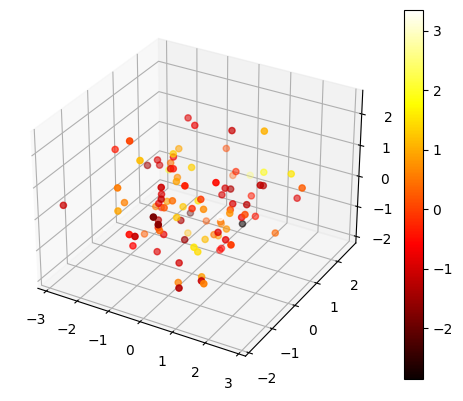

In [18]:
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.random.standard_normal(100)
y = np.random.standard_normal(100)
z = np.random.standard_normal(100)
c = np.random.standard_normal(100)

img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
fig.colorbar(img)
plt.show()

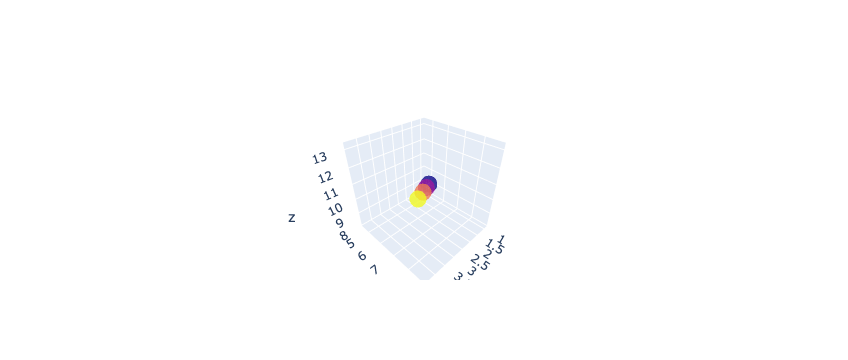

In [17]:
import plotly
x = [1, 2, 3, 4]
y = [5, 6, 7, 8]
z = [9, 10, 11, 12]
c = [13, 14, 15, 16]
ex = [0.1, 0.2, 0.3, 0.4]
ey = [0.5, 0.6, 0.7, 0.8]
ez = [0.9, 1.0, 1.1, 1.2]

fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(color=c, size=10, opacity=0.8), error_x=dict(array=ex, thickness=1, width=2), error_y=dict(array=ey, thickness=1, width=2), error_z=dict(array=ez, thickness=1, width=2))])
plotly.offline.iplot(fig)